In [19]:
import numpy as np
import torch
from d2l import torch as d2l

## Registering methods to class in a notebook way

In [20]:
# Utilities

# suppose you have a simple class

class Foo:
    def __init__(self):
        self.bias = 1

a = Foo()
a

In [21]:
# now we can register f(.) to our classes
# in a differnt code cell .
# very convenient for python notebooks...

def add_to_class(Class):
    """Register them functions"""
    def wrapper(obj):
        # setattr(object, name, value) -> sets the value of the attribute
        setattr(Class ,obj.__name__ , obj)
    return wrapper

In [22]:
@add_to_class(Foo)
def return_bias(self):
    return f"the bias is set to {self.bias}"

In [23]:
#now i can call this method on a
a.return_bias()

'the bias is set to 1'

## Registering to init in a notebook way

In [24]:

# this utility will save these arguments in class's __init__ method as class attributes
class Hyperparameters :
    """
    The base class of hyperparameters
    """
    def save_hyperparameters(self,ignore = []):
        raise NotImplemented

In [25]:
class B(d2l.HyperParameters):
    def __init__(self,a,b,c):
        # will ignore parameter c from setting
        self.save_hyperparameters(ignore=["c"])
        print("self.a =",self.a)
        print("self.b =",self.b)
        print("self.c in __init__ " , hasattr(self , "c"))
        
b = B(a=1,b=2,c=4)

self.a = 1
self.b = 2
self.c in __init__  False


## My attempt at making tensorboard kind of stuff

In [26]:
class ProgressBoard(d2l.HyperParameters):
    """
    The board will plot as mini batches passesd through the forward f(.)
    i.e plot with animation
    """
    def __init__(self , xlabel = None , ylabel = None , xlim = None , ylim = None, xscale = "linear", yscale = "linear" ,
                 ls = ["-","--","-.",":"], colors = ["C0" , "C1" , "C2" , "C3"] , fig = None , axes =None , figsize = (3.5,2.5) ,
                 display = True):
        self.save_hyperparameters()
        
        def draw(self,x,y,label , every_n:int=1):
            # my draw code would go here (overloaded here)
            raise NotImplemented
    

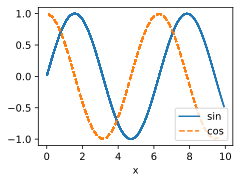

In [28]:
# example of how i intend to use this
board = d2l.ProgressBoard("x")

for x in np.arange(0,10,0.01):
    board.draw(x,np.sin(x),"sin",every_n=2)
    board.draw(x,np.cos(x),"cos",every_n=10)
